# Exercise set 6

The goal of this exercise is to go through some of the steps required
to make a predictive regression model. We will here try different types
of models, and we will also assess the models in greater detail, compared to the
previous exercises. In particular, this exercise will introduce the use of a
*training set*, a *test set*, *cross-validation* and different
measures of the errors in our models.


**Exercise 6.1:** 

Concrete is one of the most important materials in civil engineering, and it
has a rich chemical composition. The strength of concrete is a
function of its ingredients and age.
We will in this exercise investigate to what extent we can predict the
strength of concrete from the ingredients and its age, with linear models.

The [data set](https://doi.org/10.1016/S0008-8846(98)00165-3) we
will consider here contains $1030$ samples, and the
following variables have been measured:

|Variable|Unit|
|:-------|---:|
|Cement (component 1)                 | kg/m$^3$ |
|Blast Furnace Slag (component 2)     | kg/m$^3$ |
|Fly Ash (component 3)                | kg/m$^3$ |
|Water (component 4)                  | kg/m$^3$ |
|Superplasticizer (component 5)       | kg/m$^3$ |
|Coarse Aggregate (component 6)       | kg/m$^3$ |
|Fine Aggregate (component 7)         | kg/m$^3$ | 
|Age                                  | days     |
|Concrete compressive strength        | MPa      |
|**Table 1:** *Data columns present in the [Data file](Data/concrete_data.csv)*||

**(a)**
Begin by exploring the raw data. Here, it is a good idea to make scatter plots,
in particular of the strength as a function of the other variables. In addition,
you may find it useful to investigate correlations between the variables. Below,
you will find some Python code to get you started.

After looking at the raw data, are there some of the variables that seem to be
correlated with the strength of the concrete?

Index(['Sample ID', 'Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals)'],
      dtype='object')
            cement         slag          ash        water        super  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.00000

<IPython.core.display.Javascript object>


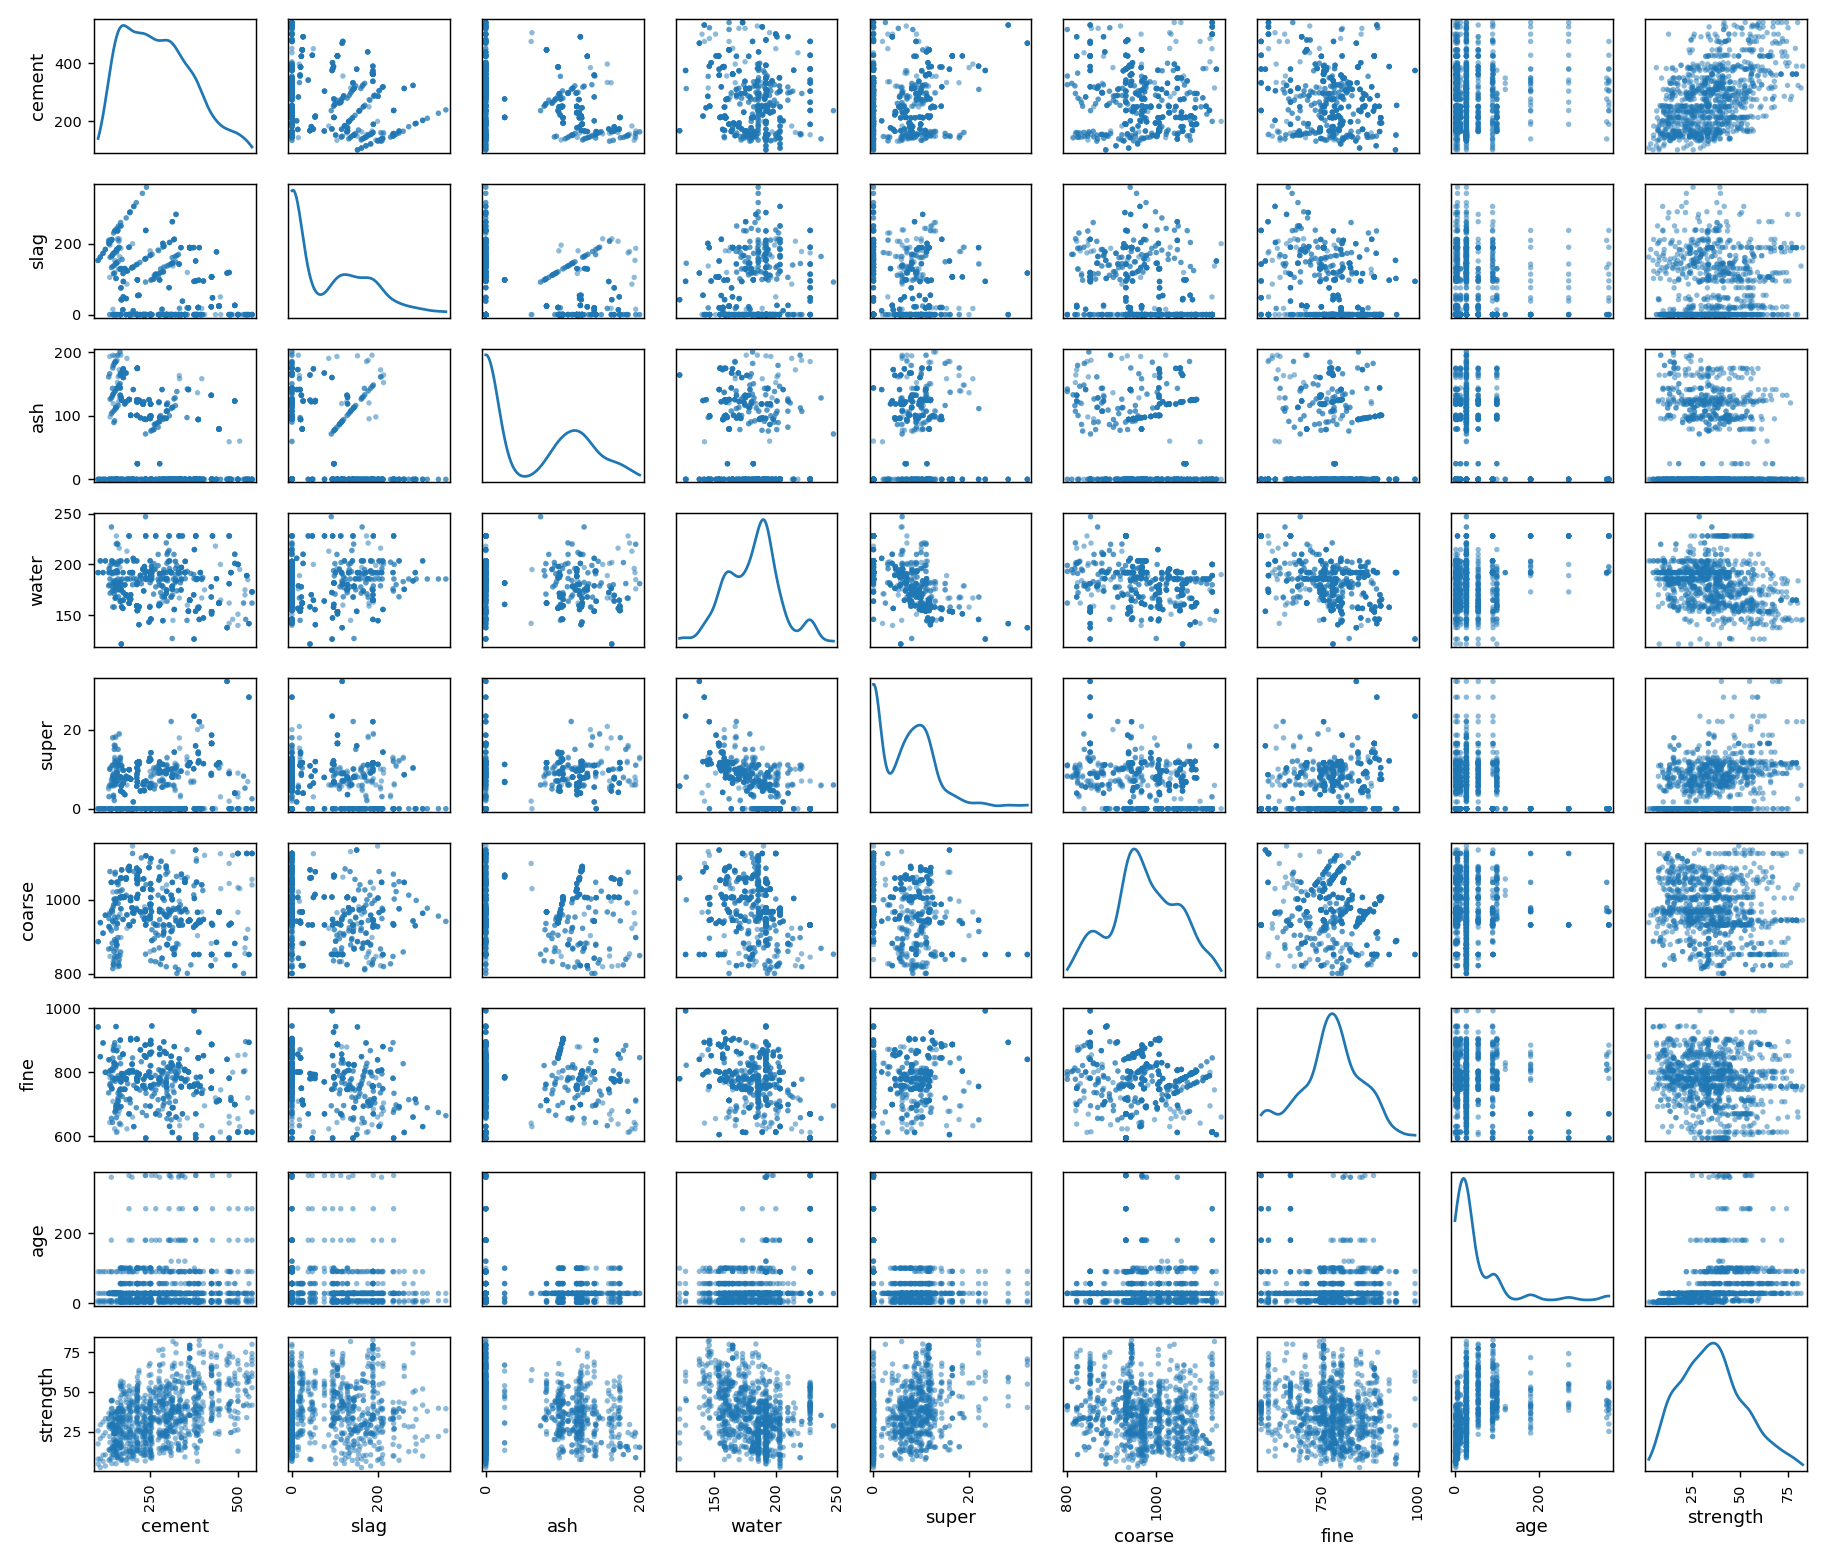

<IPython.core.display.Javascript object>


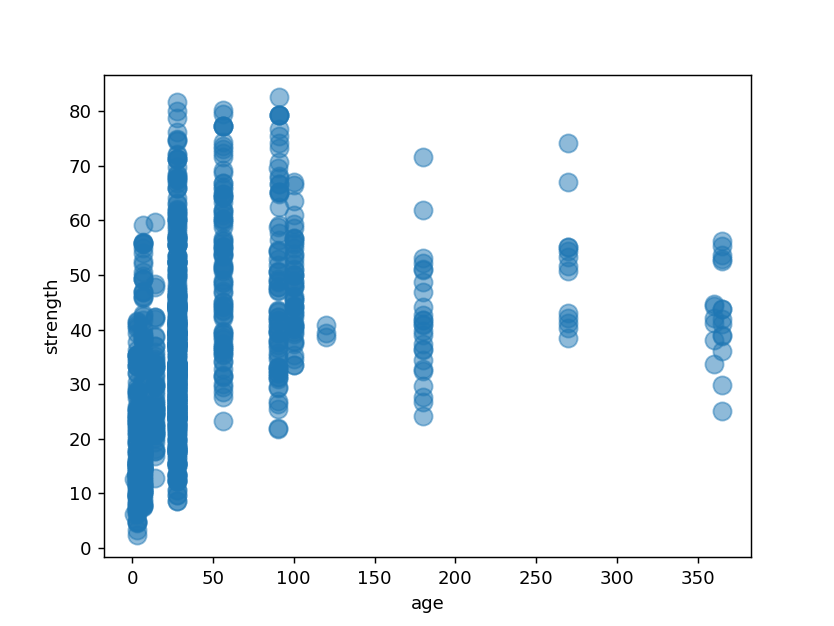

<IPython.core.display.Javascript object>


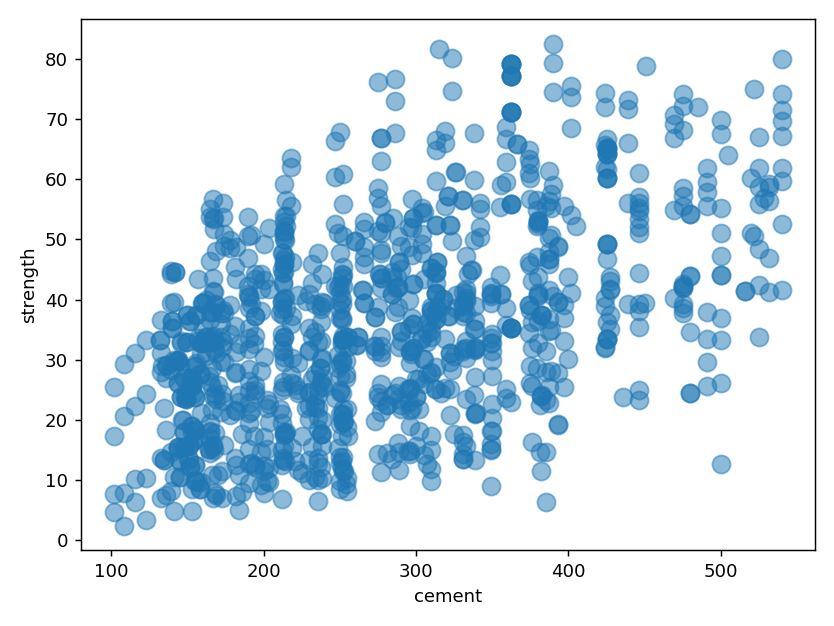

In [1]:
%matplotlib notebook
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import pandas as pd

# Load the raw data:
data = pd.read_csv('Data/concrete_data.csv')
# Print out variables:
print(data.columns)
# Rename the variables to have shorter names:
rename = {
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'super',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine',
    'Age (day)': 'age',
    'Concrete compressive strength(MPa, megapascals)': 'strength',
}
data = data.rename(columns=rename)
# Remove the ID of samples:
data = data.drop(columns=['Sample ID'])
# Print out information about the data:
print(data.describe())
# Investigate correlations:
corr = data.corr()
# Sort correlations for the strength:
print(corr['strength'].sort_values(ascending=False))
# Make scatter plots of the raw data (this will be a large figure...):
scatter_matrix(data, figsize=(14, 12), diagonal='kde')
plt.tight_layout()
# If some of the variables seem more interesting, they can be
# inspected in greater detail as follows:
data.plot(kind='scatter', x='age', y='strength', alpha=0.5, s=100)
data.plot(kind='scatter', x='cement', y='strength', alpha=0.5, s=100)
plt.tight_layout()

In [2]:
data.corr().style.background_gradient(cmap='viridis')

,cement,slag,ash,water,super,coarse,fine,age,strength
cement,1,-0.275193,-0.397475,-0.0815436,0.0927714,-0.109356,-0.22272,0.0819473,0.497833
slag,-0.275193,1,-0.323569,0.107286,0.0433757,-0.283998,-0.281593,-0.0442458,0.134824
ash,-0.397475,-0.323569,1,-0.257044,0.37734,-0.00997679,0.0790764,-0.15437,-0.105753
water,-0.0815436,0.107286,-0.257044,1,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
super,0.0927714,0.0433757,0.37734,-0.657464,1,-0.266303,0.222501,-0.192717,0.366102
coarse,-0.109356,-0.283998,-0.00997679,-0.182312,-0.266303,1,-0.178506,-0.00301551,-0.164928
fine,-0.22272,-0.281593,0.0790764,-0.450635,0.222501,-0.178506,1,-0.156094,-0.167249
age,0.0819473,-0.0442458,-0.15437,0.277604,-0.192717,-0.00301551,-0.156094,1,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1


**Answer to 6.1(a):** Looking at the correlation matrix, it looks like there is some correlation between 'cement', 'super' and 'age' with strenght

**(b)** Before we start the modeling, we will create a *training* and a *test* set. With `sklearn`, there is a
method to do this, shown below.

Here, we create a test set using $20$% of the samples from `X` and `y`. Modify this code for
your Python script, and use it to create a training set and a test set.

What is the purpose of doing this split? That is, what is the *training set* and the *test set*
used for respectively?

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
xvars = ['cement', 'slag', 'ash', 'water', 'super', 'coarse', 'fine', 'age']
X = data[xvars]
y = data['strength']
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

**Answer to 6.1(b):** To be able to *test* a *trained* algorithm with never-seen-before data. The *training* set is used for training the algorithm, and the *test* set is used to test the algorithm with data it has not seen before. 

**(c)** Our first model will be a linear least-squares model. 
In the rest of the exercise, we will refer to this
model as "model 1". For creating model 1, we will use the
`LinearRegression` class from `sklearn.linear_model`. 

Below, you will find some Python code that can be used as a starting point for
creating a linear model.

Modify your Python code to do the linear least-squares regression and plot 
the measured strengths ($y_i$) vs. the predicted strengths ($\hat{y}_i$) for
your training data.
Also, plot the residuals, $y_i - \hat{y}_i$, as a function of $y_i$. Do the
residuals seem to be homoscedastic or heteroscedastic? What does this plot
indicate?

<IPython.core.display.Javascript object>


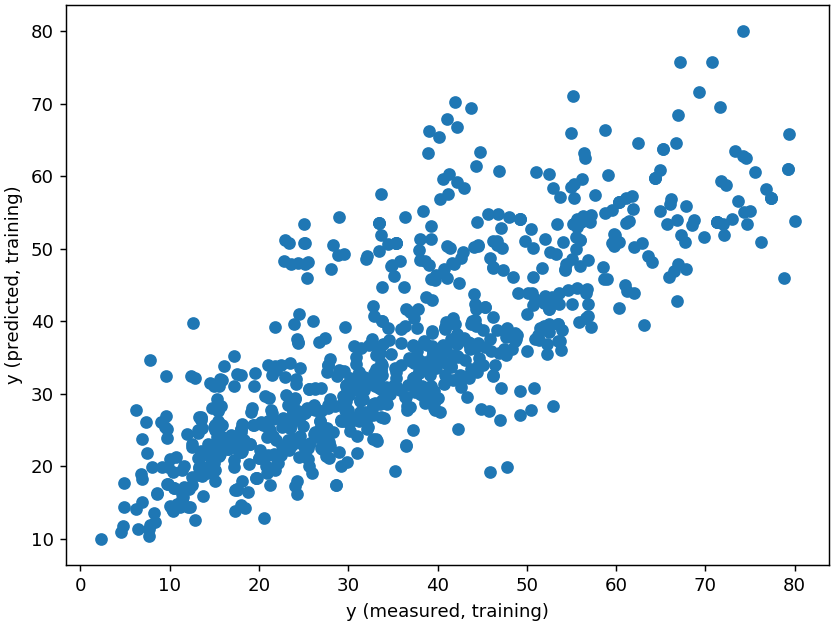

<IPython.core.display.Javascript object>


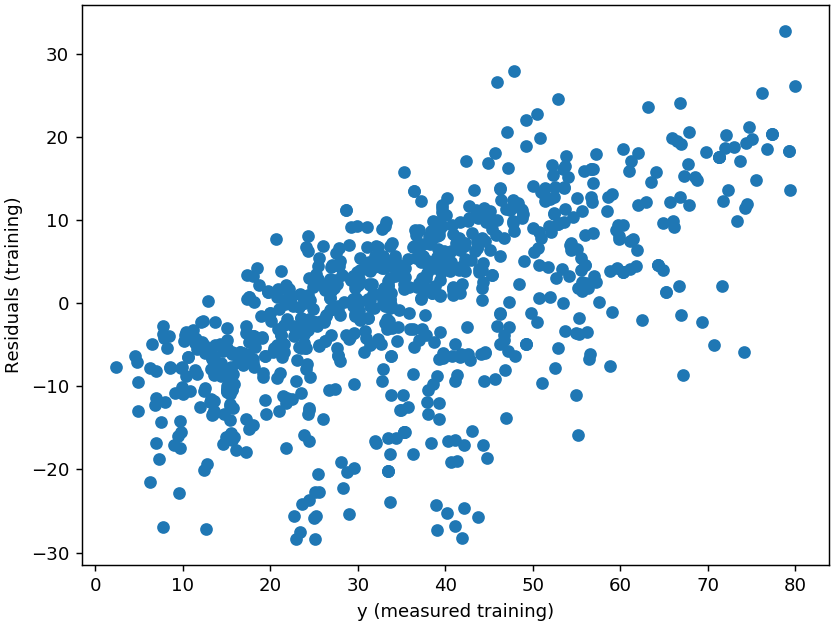

In [4]:
import numpy as np
from sklearn.preprocessing import scale

xvars = ['cement', 'slag', 'ash', 'water', 'super', 'coarse',
         'fine', 'age']
X = data[xvars]
y = data['strength']
X = scale(X)

# Create a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    
# Do a linear regression:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_hat = model1.predict(X_train)
_, ax0 = plt.subplots(constrained_layout=True)
ax0.scatter(y_train, y_hat)
ax0.set(xlabel='y (measured, training)', ylabel='y (predicted, training)');

_, ax01 = plt.subplots(constrained_layout=True)
ax01.scatter(y_train, y_train - y_hat)
ax01.set(xlabel='y (measured training)', ylabel='Residuals (training)');

**Your answer to 6.1(c):** *please see the plots above* The residuals are heteroscedastic in this case, that is, they seem to depend on the measured y. This indicates that model 1 is not able to capture the full relation between the variables and the strength.

**(d)** 
We have now created a linear model (model 1) and you may have seen that
it does not seem to perform very well.
In this part of the exercise, we will define some ways we can
assess the performance and
we will use the same assessments in the rest of the exercise for the other models we
are going to create.

* In part **(b)** of this exercise, you created a test set. This test set can be used to check
  how well the model performs for data which was not included when making it.
  Predict the strength using model 1 and the test set data. Plot the predicted
  strengths vs. the measured strengths for the test set, and compare this with the
  plot you made when creating/training model 1.

* We have, in previous exercises, used the 
  [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$,
  as a measure of well a model performs. This will also be the first metric we will use here.
  With `sklearn`, this is [available](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) as the function `r2_score` from the module `sklearn.metrics`. 
  Here, we can calculate two different $R^2$ values:
  1. Using the training set (let us call this $R^2$ in the continuation)
  2. Using the test set (let us call this $R_\text{p}^2$ in the continuation).
  
  Calculate the $R^2$ and $R_\text{p}^2$ values for model 1 and compare them.
  
* Another set of metrics for the performance is based on the mean squared error (MSE).
  This error is calculated from the difference of measured y-values ($y_i$) and predicted y-vales ($\hat{y}_i$):
  \begin{equation*}
    \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 ,
  \end{equation*}
  where $N$ is the number of samples. It is common to report the root mean squared error (RMSE) which
  is obtained by just taking the square root: $\text{RMSE} = \sqrt{\text{MSE}}$.
  Here, we can again calculate two of these values, one for the training set and one for the test set.
  We will give these two different values unique names:
  1. **RMSEC**: Root mean squared error of *calibration*, which is obtained by calculating the RMSE
     for the *training set*.
  2. **RMSEP**: Root mean squared error of *prediction*, which is obtained by calculating the RMSE
     for the *test set*.
     
  Calculate these two values for model 1.
  
  Hint: Here you can use the method [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) from
  the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
  module of `sklearn`.

In [5]:
from sklearn.metrics import r2_score, mean_squared_error
# Make the testing data plot:
y_hat = model1.predict(X_test)

# Do the R2 scoring
s_train = model1.score(X_train, y_train)
s_test = model1.score(X_test, y_test)
print(r"Training R2 score: {}".format(s_train))
print(r"Testing R2 score: {}".format(s_test))

# Do RMSE 
y_hat_train = model1.predict(X_train)
y_hat_test = model1.predict(X_test)

RMSEC = np.sqrt(mean_squared_error(y_train, y_hat_train))
RMSEP = np.sqrt(mean_squared_error(y_test, y_hat_test))

print("RMSEC =", RMSEC)
print("RMSEP =", RMSEP)

Training R2 score: 0.6210155777861786
Testing R2 score: 0.591129195848667
RMSEC = 10.28285400755077
RMSEP = 10.65951535964343


**Answer to 6.1(d):** *see output above*

**(e)**
When we are doing the actual training (or fitting) of the model,
we can also do *cross-validation*. This is in particular
useful if we have additional parameters
we need to optimize. Such additional parameters could,
for instance, be the number
of variables to include in a least-squares model,
the number of components to use in a PCR model,
or the extra parameters in regularized
regression techniques. We could then optimize these
parameters in a cross-validation step, and test the
full model using the test set.

In cross-validation, we split the training set into $k$ smaller sets.
For each of these sets, we do the following:

1. We fit/train the model using the $k-1$ other sets.
2. We evaluate the performance using the set we kept out of the fitting.

Essentially, we have trained the model $k$ times,
and we have $k$ evaluations of
the fitting. The overall performance of the fitting
can then be obtained as the
average over all the $k$ performance measures.
See Fig. 1 for a graphical overview of this approach.
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">
  
**Fig. 1:** Illustration of cross-validation where we split the training set
into $5$ smaller sets for cross-validation.
This illustration has been taken from the `sklearn`
[homepage](https://scikit-learn.org/stable/modules/cross_validation.html).
Here, we first split our original data into a training set and a test set.
We then split the training set into $5$ smaller sets in the cross-validation
step, and use this to obtain the parameters. Finally, we check the full
model using the test set.
  
We will now add a cross-validation step to our fitting.
In `sklearn`, there is a method that will do this for us,
[cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
This method can be used as follows:

In [6]:
# Create a least-squares model:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Run cross-validation:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model, X_train, y_train,
                         scoring='neg_mean_squared_error',
                         cv=10)
# Take the square root of -scores:
scores = np.sqrt(-scores)
print('Average score:', scores.mean())
print('Standard deviation for score:', scores.std())

Average score: 10.363099065353065
Standard deviation for score: 1.0346375414018756


Here, we set the following two parameters:

* `scoring`: Which defines how we evaluate the model.       
  Here we select the \emph{negative} mean squared error.
  The `cross_val_score` method expects
  that a higher score corresponds to a better
  model, which is the opposite of the meaning of the
  mean squared error. This is the reason
  or using the *negative* mean squared error.
                
* `cv`: Which defines how many
  splits we will do for the data.
  In this case, we will split the data $10$ times.

Update your script to include a cross-validation step.
It is common to report the average score as
a so-called "root mean squared error of cross-validation"
(abbreviated RMSECV). Calculate RMSECV for model 1,
and compare it with the RMSEC and RMSEP values you obtained previously.

Average score (RMSECV) = 10.363099065353065
Standard deviation for score = 1.0346375414018756


<IPython.core.display.Javascript object>


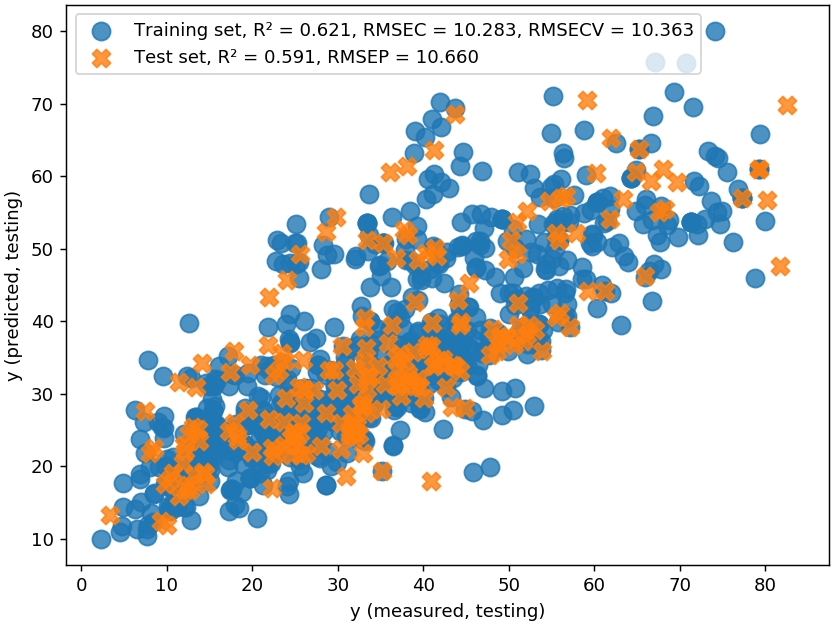

In [7]:
# Do cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_train, y_train,
                         scoring='neg_mean_squared_error',
                         cv=10)
scores = np.sqrt(-scores)
rmsecv = scores.mean()
print('Average score (RMSECV) =', rmsecv)
print('Standard deviation for score =', scores.std())

_, ax1 = plt.subplots(constrained_layout=True)
ax1.set(xlabel='y (measured, testing)', ylabel='y (predicted, testing)');
lab1 = 'Training set, R² = {:.3f}, RMSEC = {:.3f}, RMSECV = {:.3f}'.format(
    s_train, RMSEC, rmsecv
)
lab2 = 'Test set, R² = {:.3f}, RMSEP = {:.3f}'.format(s_test, RMSEP)
ax1.scatter(y_train, y_hat_train, label=lab1, s=100, marker='o', alpha=0.8)
ax1.scatter(y_test, y_hat_test, label=lab2, s=100, marker='X', alpha=0.8)
ax1.legend();

**Answer to 6.1(e):** *see output above* The calculated RMSECV is similar
to the RMSEC and RMSEP and it has a reletively low standard deviation (≈ 1.03).
A high standard deviation (by "high" we mean a value which is comparable to the
average) for RMSECV can indicate that we have problems with outliers in our data.

**(f)**
We are not too happy with the performance of the model we have so far.
In the lectures, we have briefly mentioned regularized
regression methods as an alternative to least-squares regression.
We will here see if using a regularized fitting method, the so-called
[Ridge regression method](https://en.wikipedia.org/wiki/Tikhonov_regularization), will improve things.

In `sklearn`, this method is available from
[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge).

When using this method, we have to specify one additional
parameter, $\alpha$, which determines how strongly we penalize
large coefficients. This is an unknown parameter, and we need to
find the "best" one to use. One approach to finding the best $\alpha$
is to just try different values and look for the $\alpha$ value
that gives the lowest RMSECV. Luckily, this process can be automated
in `sklearn` by using a method
called [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). This method will automatically
try different $\alpha$ values from a range we specify, and locate
the best parameter by scoring each parameter with cross-validation.
This can be implemented as follows:

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
# We will look for alpha parameters between 0 and 1.5 in steps of 0.01:
parameters = [{'alpha': np.arange(0, 1.5, 0.01)}]
grid = GridSearchCV(ridge, parameters,
                    cv=10,
                    scoring='neg_mean_squared_error',
                    return_train_score=True)
grid.fit(X_train, y_train)
print(np.sqrt(-grid.best_score_))
print(grid.best_params_)
print(grid.best_estimator_)

10.414108346932807
{'alpha': 1.06}
Ridge(alpha=1.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


Create a new model, "model 2", in which you use Ridge regression.
Use the Python code given above as
a starting point for determining $\alpha$ and fit
the model using this $\alpha$ value. Further,
calculate $R^2$, $R_\text{p}^2$, RMSEC, RMSEP, and RMSECV for model 2.
How does model 2 compare with model 1?

R^2 = 0.6209849517633772
R^_p = 0.5914240328308482
RMSEC = 10.283269481829928
RMSEP = 10.655671375082985
Average score (RMSECV) = 10.363177779801543
Standard deviation for score = 1.0286879827640085


<IPython.core.display.Javascript object>


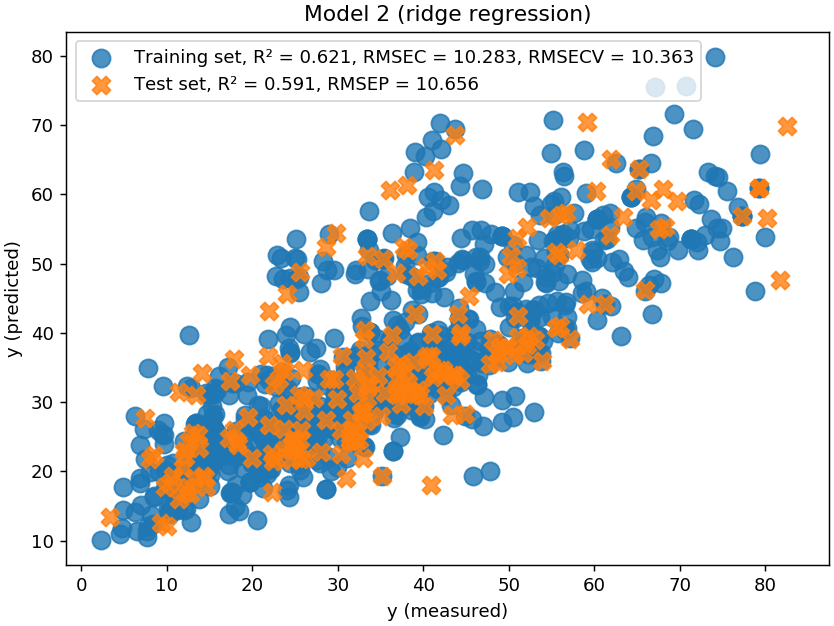

In [9]:
model2 = grid.best_estimator_
model2.fit(X_train, y_train)
y_hat2 = model2.predict(X_train)
y_hat_test2 = model2.predict(X_test)
rsq2 = r2_score(y_train, y_hat2)
rsq_p2 = r2_score(y_test, y_hat_test2)
print('R^2 =', rsq2)
print('R^_p =', rsq_p2)
rmsec2 = np.sqrt(mean_squared_error(y_train, y_hat2))
rmsep2 = np.sqrt(mean_squared_error(y_test, y_hat_test2))
print('RMSEC =', rmsec2)
print('RMSEP =', rmsep2)
scores2 = cross_val_score(model2, X_train, y_train,
                          scoring='neg_mean_squared_error',
                          cv=10)
scores2 = np.sqrt(-scores2)
rmsecv2 = scores2.mean()
print('Average score (RMSECV) =', rmsecv2)
print('Standard deviation for score =', scores2.std())
_, ax2 = plt.subplots(constrained_layout=True)
lab1 = 'Training set, R² = {:.3f}, RMSEC = {:.3f}, RMSECV = {:.3f}'.format(
    rsq2, rmsec2, rmsecv2
)
lab2 = 'Test set, R² = {:.3f}, RMSEP = {:.3f}'.format(rsq_p2, rmsep2)
ax2.scatter(y_train, y_hat2, label=lab1, s=100, marker='o', alpha=0.8)
ax2.scatter(y_test, y_hat_test2, label=lab2, s=100, marker='X', alpha=0.8)
ax2.set(xlabel='y (measured)', ylabel='y (predicted)');
ax2.legend();
ax2.set_title('Model 2 (ridge regression)');

**Answer to 6.1(f):** *see output above*

In addition, we see that this
model does not improve on our model 1. We can take this
as indicating that we do not have the problems
that ridge regression can solve: overfitting and/or colinearity.
We can thus already predict that PLSR will likely not improve
the results either.

**(g)**
A powerful alternative for doing regression is the PLSR method.
We will in this step investigate if PLSR can improve our ability
to predict the strength. Below, you will find some code for
running PLSR. Implement this in your script.

Trying with 1 PLS components
Trying with 2 PLS components
Trying with 3 PLS components
Trying with 4 PLS components
Trying with 5 PLS components
Trying with 6 PLS components
Trying with 7 PLS components
Trying with 8 PLS components


<IPython.core.display.Javascript object>


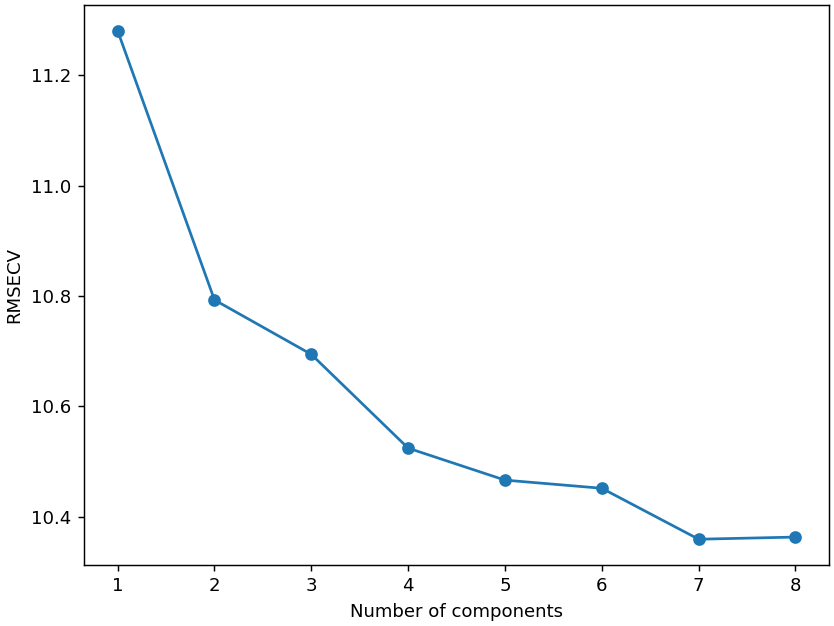

In [10]:
# Create a PLSR model:
from sklearn.cross_decomposition import PLSRegression
max_components = 8  # Maxmum number = number of original variables.
# Run cross-validation:
results = []
for i in range(1, max_components + 1):
    print('Trying with {} PLS components'.format(i))
    plsr_model = PLSRegression(n_components=i)
    scores = cross_val_score(plsr_model, X_train, y_train,
                             scoring='neg_mean_squared_error',
                             cv=10)
    rmsecv = np.average(np.sqrt(-scores))
    results.append((i, rmsecv))
results = np.array(results)
fig, axi = plt.subplots(constrained_layout=True)
axi.plot(results[:, 0], results[:, 1], marker='o')
axi.set(xlabel='Number of components', ylabel='RMSECV');

Note that we here use cross-validation for determining
the number of PLS components we use. What seems to be the best
number of components in this case?
Create a new model, "model 3", in which you use
*only* $2$ PLS components. Calculate
$R^2$ $R_\text{p}^2$, RMSEC, RMSEP, and RMSECV for model 3.
How does this model compare with model 1 and model 2?

R^2 = 0.5855799816007833
R^_p = 0.5705842498040293
RMSEC = 10.752844197626263
RMSEP = 10.924042831634528
Average score (RMSECV) = 10.792803850402981
Standard deviation for score = 1.0814328718204511


<IPython.core.display.Javascript object>


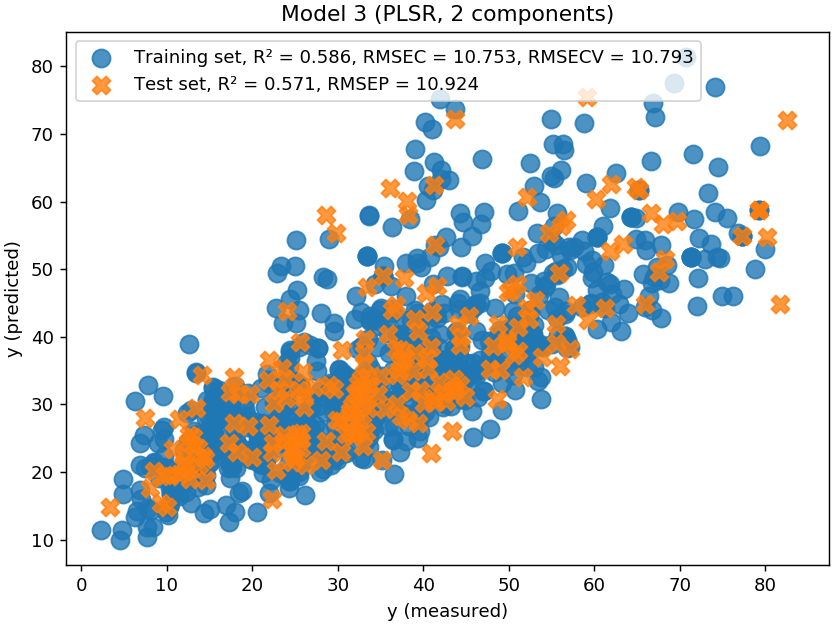

In [11]:
model3 = PLSRegression(n_components=2)
model3.fit(X_train, y_train)
y_hat3 = model3.predict(X_train)
y_hat_test3 = model3.predict(X_test)

rsq3 = r2_score(y_train, y_hat3)
rsq_p3 = r2_score(y_test, y_hat_test3)
print('R^2 =', rsq3)
print('R^_p =', rsq_p3)
rmsec3 = np.sqrt(mean_squared_error(y_train, y_hat3))
rmsep3 = np.sqrt(mean_squared_error(y_test, y_hat_test3))
print('RMSEC =', rmsec3)
print('RMSEP =', rmsep3)
scores3 = cross_val_score(model3, X_train, y_train,
                          scoring='neg_mean_squared_error',
                          cv=10)
scores3 = np.sqrt(-scores3)
rmsecv3 = scores3.mean()
print('Average score (RMSECV) =', rmsecv3)
print('Standard deviation for score =', scores3.std())
_, ax3 = plt.subplots(constrained_layout=True)
lab1 = 'Training set, R² = {:.3f}, RMSEC = {:.3f}, RMSECV = {:.3f}'.format(
    rsq3, rmsec3, rmsecv3
)
lab2 = 'Test set, R² = {:.3f}, RMSEP = {:.3f}'.format(rsq_p3, rmsep3)
ax3.scatter(y_train, y_hat3, label=lab1, s=100, marker='o', alpha=0.8)
ax3.scatter(y_test, y_hat_test3, label=lab2, s=100, marker='X', alpha=0.8)
ax3.set(xlabel='y (measured)', ylabel='y (predicted)');
ax3.legend();
ax3.set_title('Model 3 (PLSR, 2 components)');

**Your answer to 6.1(g):** *see the output above*

From the plot of RMSECV as a function of the number of components
we see that the best number of components seems to be $7$. This is
a large number, almost equal to the number of original
variables. This is in line with the results from model 2:
colinearity does not seem to be a big problem when predicting
the strength and our original variables do not seem to be
correlated.

**(h)**
So far, we have not found a good model for
predicting the strength. One option now is to try to use
even more advanced regression methods. However, it
is often a good idea to try to understand the problem we are dealing
with better, before using more complex methods.
Luckily, we have a colleague who is
an expert on concrete. From that colleague, we learn that the strength
depends on the variables we have measured in a highly non-linear way! Our
coworker also tells us that they often find that the strength depends on:

* The water to cement ratio.
* The logarithm of the age, $\ln(\text{age})$.

Motivated by this, create a new least-squared model, "model 4",
in which you include the water to cement ratio
and $\ln(\text{age})$ as variables.
Calculate $R^2$ $R_\text{p}^2$, RMSEC, RMSEP, and RMSECV for model 4, and
compare this with your previous models.

R^2 = 0.8212159159264577
R^_p = 0.8082734567880329
RMSEC = 7.062645651661179
RMSEP = 7.299372559269892
Average score (RMSECV) = 7.1056478218656
Standard deviation for score = 0.7327832930514272


<IPython.core.display.Javascript object>


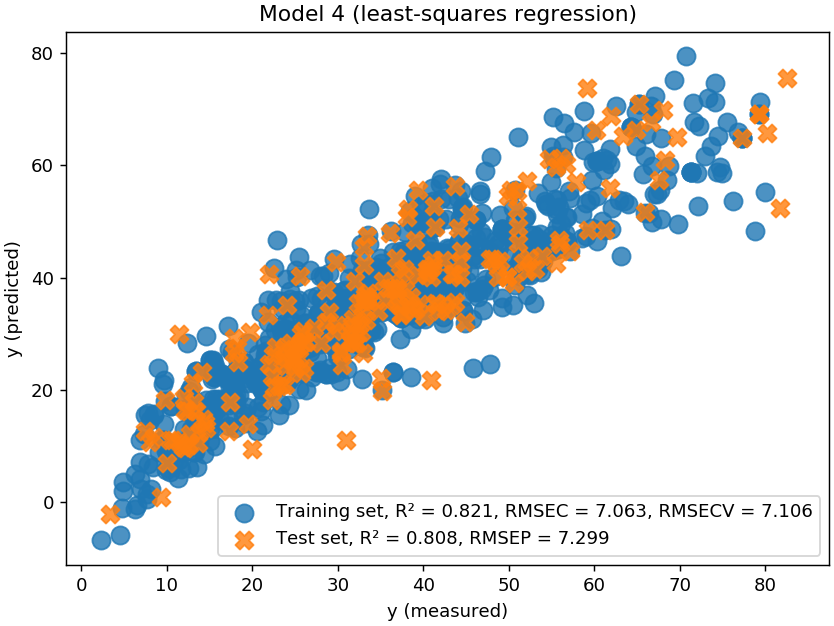

In [12]:
data['ln(age)'] = np.log(data['age'])
data['water/cement'] = data['water'] / data['cement']

xvars = ['cement', 'slag', 'ash', 'super', 'coarse',
         'fine', 'ln(age)', 'water/cement']

X = data[xvars]
y = data[['strength']]
X = scale(X)
# Create a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# Create the new model:
model4 = LinearRegression()

model4.fit(X_train, y_train)

y_hat4 = model4.predict(X_train)
y_hat_test4 = model4.predict(X_test)

rsq4 = r2_score(y_train, y_hat4)
rsq_p4 = r2_score(y_test, y_hat_test4)
print('R^2 =', rsq4)
print('R^_p =', rsq_p4)
rmsec4 = np.sqrt(mean_squared_error(y_train, y_hat4))
rmsep4 = np.sqrt(mean_squared_error(y_test, y_hat_test4))
print('RMSEC =', rmsec4)
print('RMSEP =', rmsep4)
scores4 = cross_val_score(model4, X_train, y_train,
                          scoring='neg_mean_squared_error',
                          cv=10)
scores4 = np.sqrt(-scores4)
rmsecv4 = scores4.mean()
print('Average score (RMSECV) =', rmsecv4)
print('Standard deviation for score =', scores4.std())

_, ax4 = plt.subplots(constrained_layout=True)
lab1 = 'Training set, R² = {:.3f}, RMSEC = {:.3f}, RMSECV = {:.3f}'.format(
    rsq4, rmsec4, rmsecv4
)
lab2 = 'Test set, R² = {:.3f}, RMSEP = {:.3f}'.format(rsq_p4, rmsep4)
ax4.scatter(y_train, y_hat4, label=lab1, s=100, marker='o', alpha=0.8)
ax4.scatter(y_test, y_hat_test4, label=lab2, s=100, marker='X', alpha=0.8)
ax4.set(xlabel='y (measured)', ylabel='y (predicted)');
ax4.set_title('Model 4 (least-squares regression)');
ax4.legend();

**Your answer to 6.1(h):** *see the output above*
    
We see that
including the new variables improves our predictive ability.
Within the field of concrete, it is known that the strength
depends on the measured variables in a non-linear way. By making
two relatively simple transformations of our original variables, we
can create a better model.

As an alternative, you will find
some Python code below which creates a
model based on a [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning).

This model is prone to overfitting
as can be seen from the high $R^2$ value. This can also be
seem from the large difference in the RMSEC and RMSECV values.
We see also the
importance of having a test set in this case. The metrics when
applying the model to the test set is significantly poorer than for
the training set. Without the test set, we could have
accepted the overfitted model, and gotten bad results,
for instance, when trying to create new high-strength concrete.

In the literature, you can find rather sophisticated models
for predicting the strength. For the curious student, we refer
to a [paper](https://doi.org/10.1016/S0008-8846(98)00165-3)
in which artificial neural networks are used
to predict the strength.

R^2 = 0.9967760262618252
R^_p = 0.903220202981011
RMSEC 0.9484157075047128
RMSEP 5.1860507567369565
Average score: (RMSECV) 6.384110513575725
Standard deviation for score: 1.2284357778376513


<IPython.core.display.Javascript object>


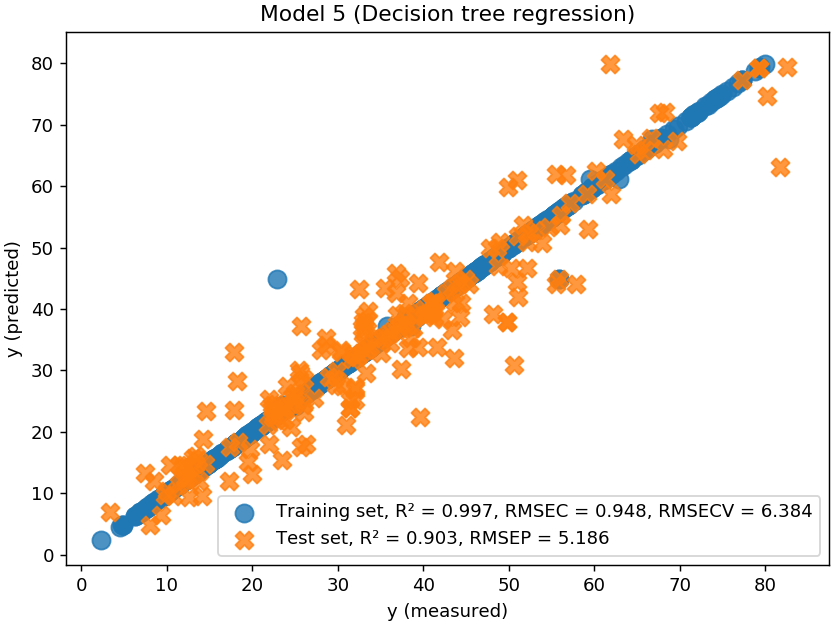

In [13]:
# Create a decision tree regression model:
from sklearn.tree import DecisionTreeRegressor
xvars = ['cement', 'slag', 'ash', 'super', 'coarse',
         'fine', 'age', 'water']
X = data[xvars]
y = data['strength']
X = scale(X)
# Create a test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model5 = DecisionTreeRegressor()

model5.fit(X_train, y_train)

y_hat5 = model5.predict(X_train)
y_hat_test5 = model5.predict(X_test)

rsq5 = r2_score(y_train, y_hat5)
rsq_p5 = r2_score(y_test, y_hat_test5)
print('R^2 =', rsq5)
print('R^_p =', rsq_p5)
rmsec5 = np.sqrt(mean_squared_error(y_train, y_hat5))
rmsep5 = np.sqrt(mean_squared_error(y_test, y_hat_test5))
print('RMSEC', rmsec5)
print('RMSEP', rmsep5)
scores5 = cross_val_score(model5, X_train, y_train,
                          scoring='neg_mean_squared_error',
                          cv=10)
scores5 = np.sqrt(-scores5)
rmsecv5 = scores5.mean()
print('Average score: (RMSECV)', rmsecv5)
print('Standard deviation for score:', scores5.std())

_, ax5 = plt.subplots(constrained_layout=True)
lab1 = 'Training set, R² = {:.3f}, RMSEC = {:.3f}, RMSECV = {:.3f}'.format(
    rsq5, rmsec5, rmsecv5
)
lab2 = 'Test set, R² = {:.3f}, RMSEP = {:.3f}'.format(rsq_p5, rmsep5)
ax5.scatter(y_train, y_hat5, label=lab1, s=100, marker='o', alpha=0.8)
ax5.scatter(y_test, y_hat_test5, label=lab2, s=100, marker='X', alpha=0.8)
ax5.set(xlabel='y (measured)', ylabel='y (predicted)')
ax5.set_title('Model 5 (Decision tree regression)')
ax5.legend();